In [21]:
# Load relevant packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from unidecode import unidecode

mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['xtick.labelsize'] = 14

In [139]:
df_motos = pd.read_csv("./DATA/MOTOS/motos.csv")


C:\Users\CP-ERICSSON\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (11,22,24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


DATASET CLEANING

In [140]:
# Eliminar acentos en el nombre de las columnas
df_motos.columns = [unidecode(str(col)) for col in df_motos.columns]

# Reemplazar espacios por _
df_motos.columns = df_motos.columns.str.replace(' ', '_')
    
# Strip
df_motos.columns = df_motos.columns.str.strip()

# Reemplazar espacios por _
df_motos.columns = df_motos.columns.str.lower()

#  Reemplazar NaN, None
df_motos.replace('-', np.nan, inplace=True)

# Set axis name
df_motos.rename_axis('id', inplace=True)

# cambio formato fecha
df_motos['fecha'] = pd.to_datetime(df_motos['fecha'])

In [165]:
df_motos.head(3)

,fecha,departamento,municipio,dia,hora,barrio,zona,clase_de_sitio,arma_empleada,movil_agresor,...,clase_de_empleado,profesion,escolaridad,codigo_dane,clase,marca,linea,modelo,color,cantidad
id,,,,,,,,,,,,,,,,,,,,,
0,2010-01-01,ANTIOQUIA,BELLO,Viernes,10:00:00,LA CABAÑITA,URBANA,FRENTE A RESIDENCIAS - VIA PUBLICA,LLAVE MAESTRA,NaN,...,EMPLEADO PARTICULAR,NaN,SECUNDARIA,5088000.0,MOTOCICLETA,SUZUKI,AN100T,2008,NEGRO,1
1,2010-01-01,ANTIOQUIA,BELLO,Viernes,06:00:00,SAN JOSE OBRERO,URBANA,FRENTE A RESIDENCIAS - VIA PUBLICA,LLAVE MAESTRA,NaN,...,NO REPORTA,NaN,SECUNDARIA,5088000.0,MOTOCICLETA,AKT,AK 125,2007,NEGRO,1
2,2010-01-01,ANTIOQUIA,CAUCASIA,Viernes,14:40:00,EL CASTILLO,URBANA,VIAS PUBLICAS,NO REPORTADO,A PIE,...,INDEPENDIENTE,NaN,NaN,5154000.0,MOTOCICLETA,BAJAJ,BOXER TEC,2006,ROJO,1


In [141]:

print (df_motos.columns)
len(df_motos)


Index(['fecha', 'departamento', 'municipio', 'dia', 'hora', 'barrio', 'zona',
       'clase_de_sitio', 'arma_empleada', 'movil_agresor', 'movil_victima',
       'edad', 'sexo', 'estado_civil', 'pais_de_nacimiento',
       'clase_de_empleado', 'profesion', 'escolaridad', 'codigo_dane', 'clase',
       'marca', 'linea', 'modelo', 'color', 'cantidad'],
      dtype='object')


260925

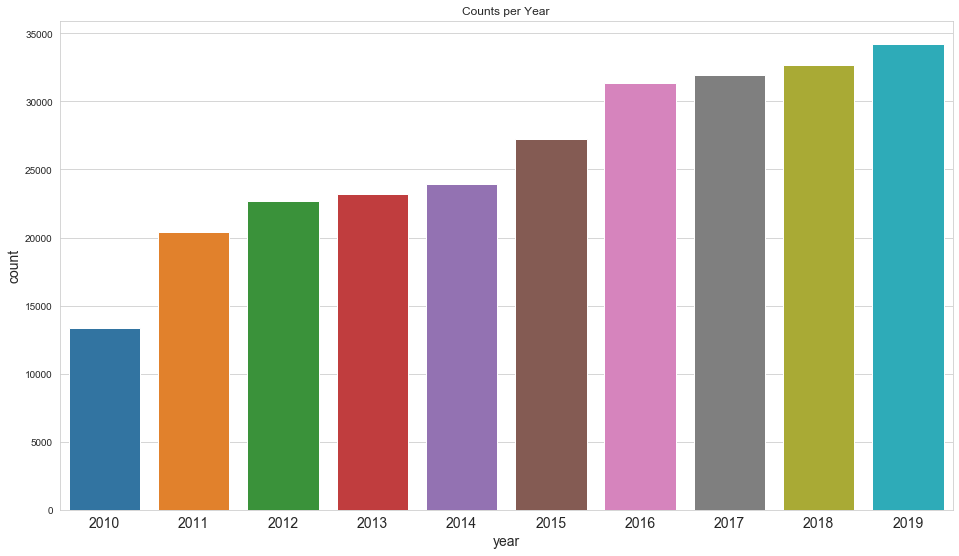

In [146]:
sns.set_style('whitegrid')
plt.figure(figsize=(16,9))
ax = sns.countplot(
    data=df_motos.assign(year = lambda df: df.fecha.dt.year),
    x='year',
)

ax.set_title('Counts per Year');

In [155]:
df_motos.groupby([df_motos['fecha'].dt.year])['fecha'].count()

fecha
2010    13346
2011    20420
2012    22650
2013    23163
2014    23912
2015    27250
2016    31362
2017    31938
2018    32657
2019    34227
Name: fecha, dtype: int64

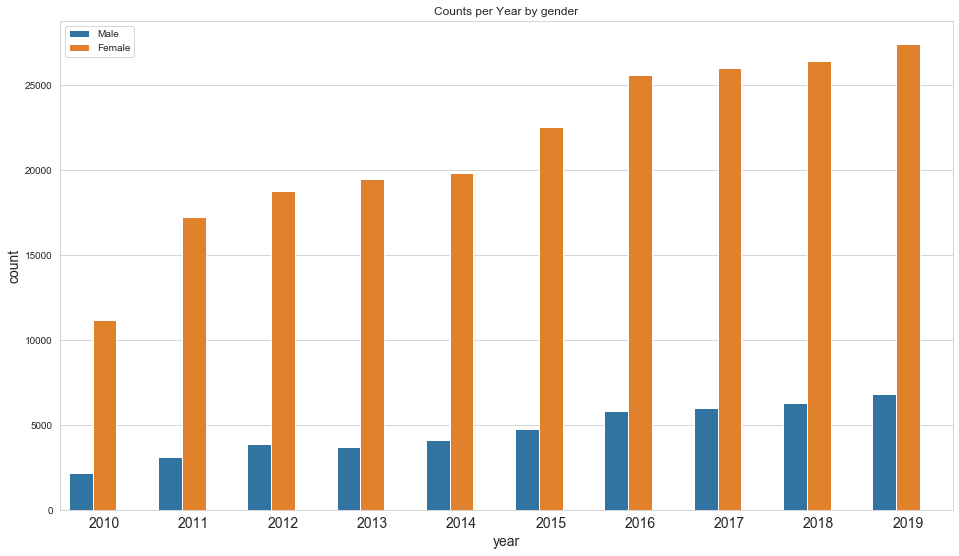

In [144]:
sns.set_style('whitegrid')
plt.figure(figsize=(16,9))
ax = sns.countplot(
    data=df_motos.assign(year = lambda df: df.fecha.dt.year),
    x='year',
    hue='sexo'
)

ax.set_title('Counts per Year by gender');
ax.legend(['Male', 'Female']);

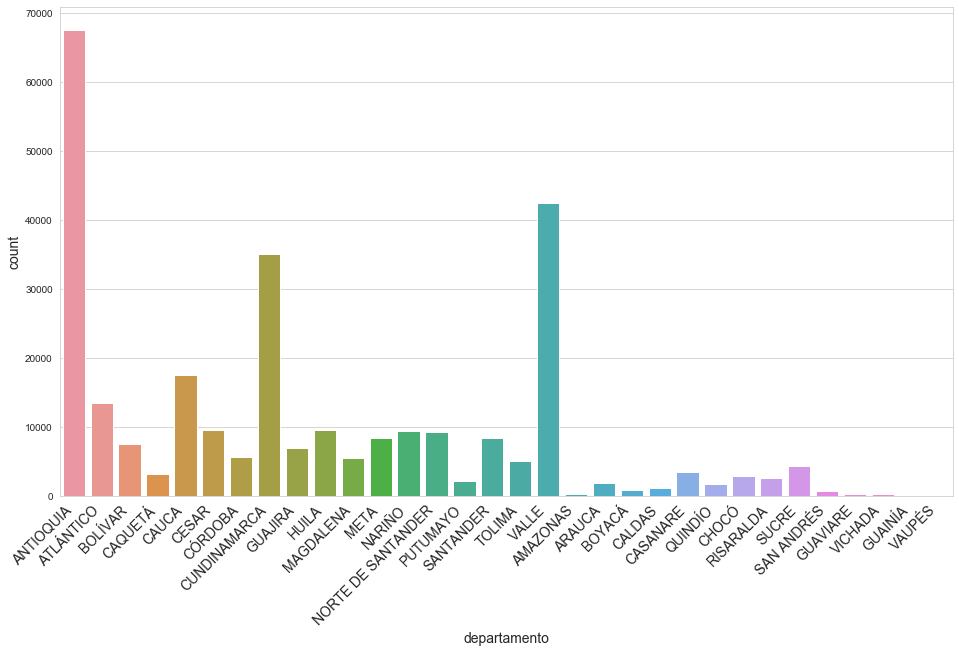

In [48]:
plt.figure(figsize=(16,9))
ax = sns.countplot(
    data=df_motos,
    x='departamento'
)

plt.xticks(rotation=45,ha='right');

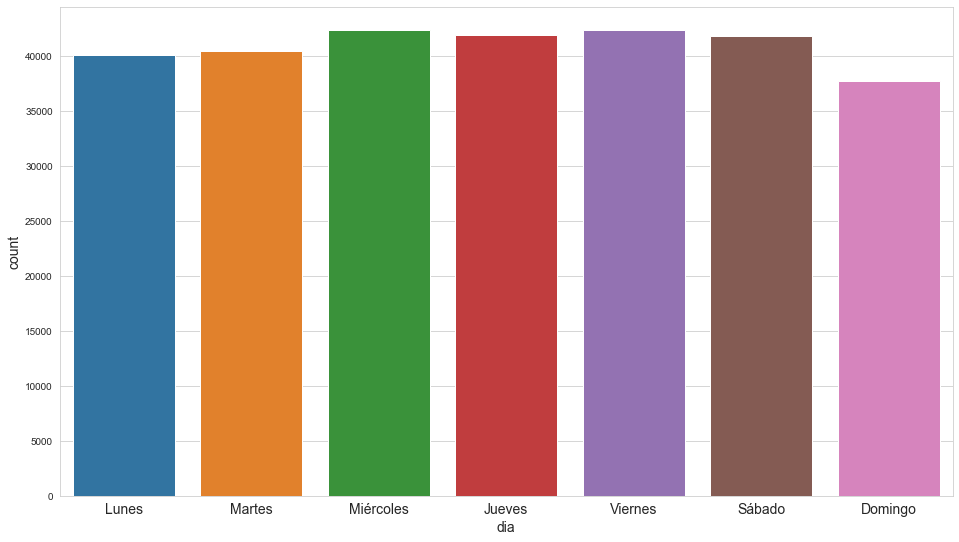

In [39]:
plt.figure(figsize=(16,9))

order = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
ax = sns.countplot(
    data=df_motos,
    x='dia',
    order=order
)


In [160]:
df_motos[df_motos['dia'].isin(['Miércoles','Jueves','Viernes'])].groupby(['dia'])['dia'].count().mean()

38447.666666666664

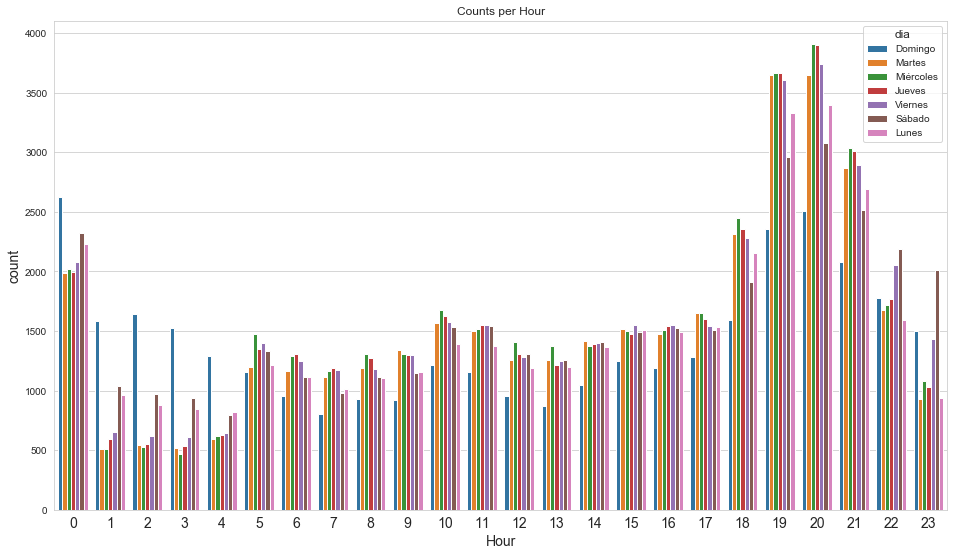

In [211]:
sns.set_style('whitegrid')
plt.figure(figsize=(16,9))
order = ['Domingo', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Lunes']
ax = sns.countplot(
    data=df_motos.assign(Hour = lambda x: pd.to_datetime(df_motos['hora'],format= '%H:%M:%S' ).dt.hour),
    x='Hour',
    #y= 'Hour',
    hue='dia',
    hue_order=order
)

ax.set_title('Counts per Hour');

[Text(0, 0.5, 'theft Count'), Text(0.5, 0, 'Hour')]

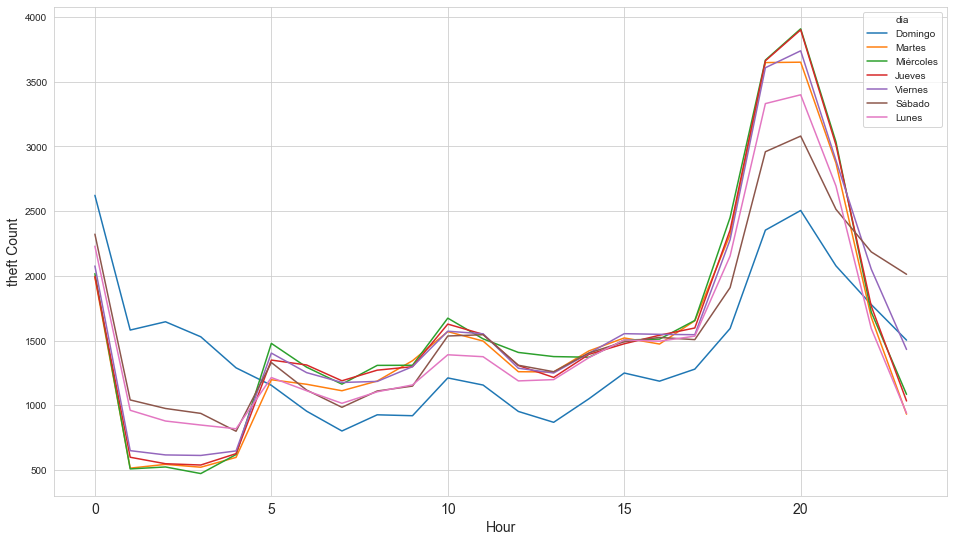

In [220]:
df_m=df_motos.copy()
df_m['hora-h']=pd.to_datetime(df_motos['hora'],format= '%H:%M:%S' ).dt.hour

sns.set_style('whitegrid')
plt.figure(figsize=(16,9))
order = ['Domingo', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Lunes']
ax = sns.lineplot(
    data=df_m.groupby(['dia','hora-h'])['hora'].count().reset_index(),
    x='hora-h',
    y= 'hora',
    hue='dia',
    hue_order=order
)
ax.set(xlabel='Hour', ylabel='theft Count')
#ax.set_title('Counts per Hour');

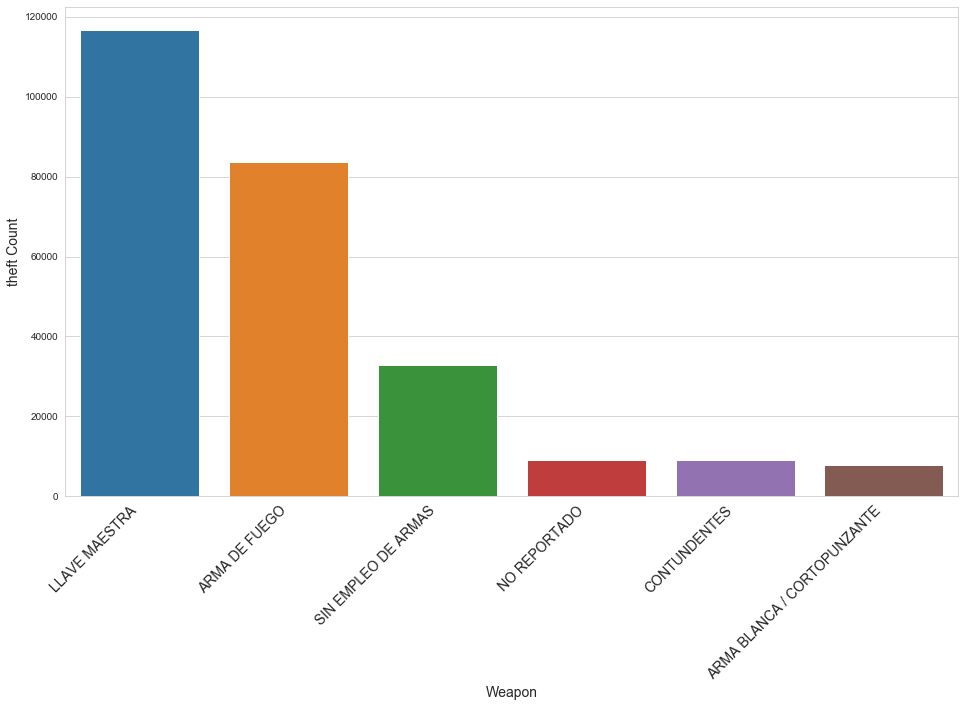

In [242]:
# Arma

plt.figure(figsize=(16,9))
ax = sns.barplot(
    data=df_motos.groupby(['arma_empleada'])['hora'].count().sort_values(ascending=False).reset_index().head(6),
    x='arma_empleada', y='hora')

ax.set(xlabel='Weapon', ylabel='theft Count')
plt.xticks(rotation=45,ha='right');


In [239]:
df_motos.groupby(['arma_empleada'])['hora'].count().sort_values(ascending=False).reset_index().head(6)

,arma_empleada,hora
0,LLAVE MAESTRA,116534
1,ARMA DE FUEGO,83557
2,SIN EMPLEO DE ARMAS,32886
3,NO REPORTADO,9220
4,CONTUNDENTES,9102
5,ARMA BLANCA / CORTOPUNZANTE,7876


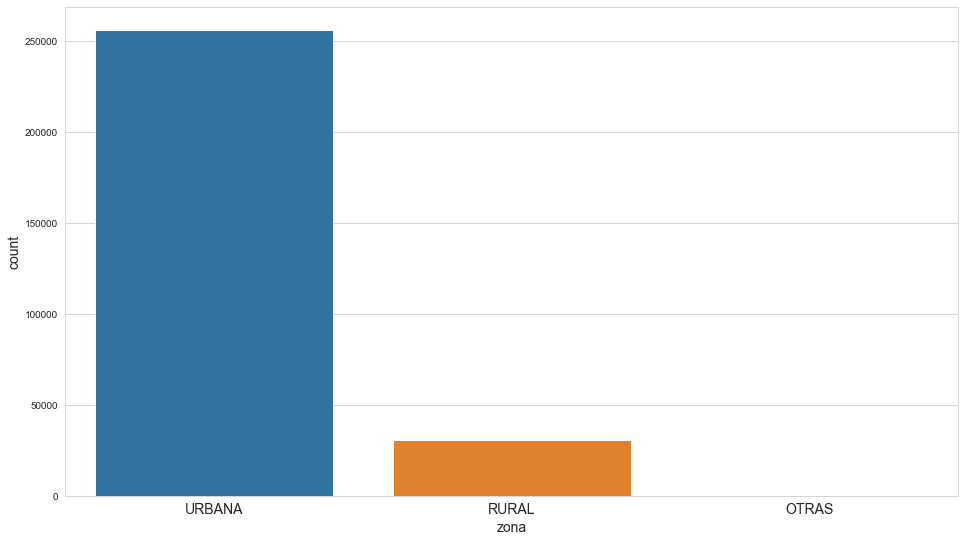

In [41]:
plt.figure(figsize=(16,9))
ax = sns.countplot(
    data=df_motos,
    x='zona',
)

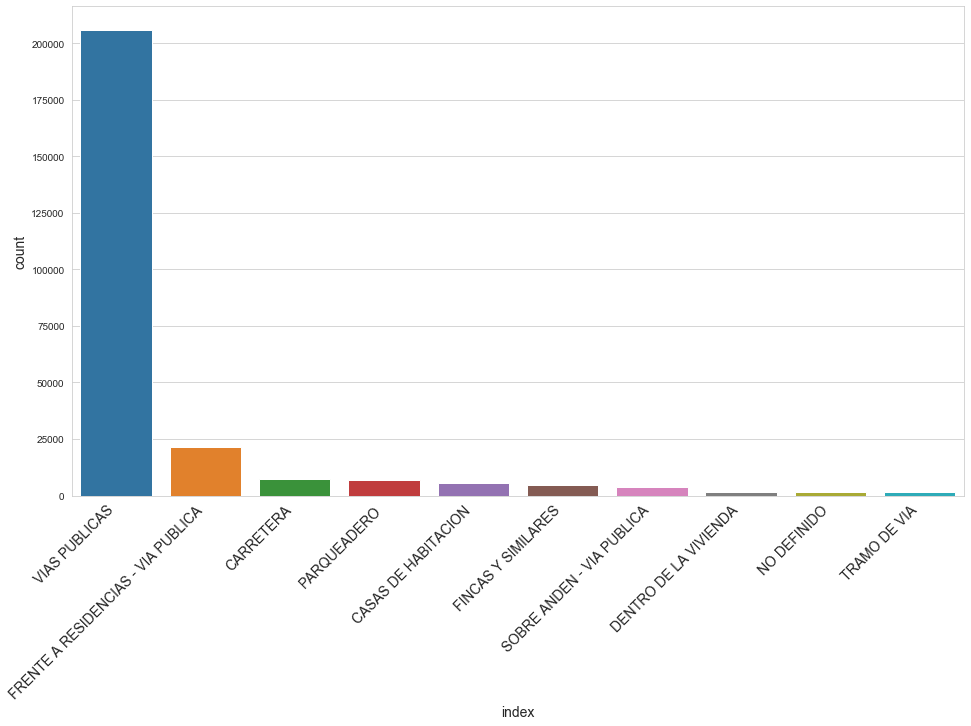

In [42]:
plt.figure(figsize=(16,9))

sns.barplot(
    data=df_motos.clase_de_sitio.value_counts().head(10).to_frame(name='count').reset_index(),
    x='index',
    y='count'
) 

plt.xticks(rotation=45, ha='right');